In [17]:
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pynbody.plot as pp
import pickle
import pandas as pd

# set the config to prioritize the AHF catalog
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]

# we define the operation as a function, which takes in filepath and halo nums as input
# you should rename 'operation' to correspond to whatever it is doing
# i.e. if it computes gas fraction you should change the line below to `def gasFrac(filepath,halo_nums):`

# prop is the property that you are computing
prop = 'GasFraction'

def operation(filepath,halo_nums):
    # first, load in the simulation and halos
    s = pynbody.load(filepath)
    s.physical_units()
    h = s.halos()
    # then we open the .data file
    with open(filepath+prop+'.data','wb') as f:
        # we loop through all the halos, compute a value for that halo, and add it to the .data file
        for halo_num in halo_nums:
            # we load the copy of the halo to minimize computational stress
            halo = h.load_copy(halo_num)
            halo.physical_units()
            
            ###################################
            # here is where you compute your stuff
            # i.e. calculate the color, gas fraction, mass of each halo
            # so in this example we will just compute the stellar mass and the gas mass
            
            mstar = np.sum(halo.star['mass'])
            mgas  = np.sum(halo.gas['mass'])
            GasFrac = mgas/(mstar+mgas)
            mHI = np.sum(h[halo_num].gas['HI']*halo.gas['mass'])
            HIGasFrac = mHI/(mstar)
            #print(halo_num,nstar,ngas)
            ###################################
            
            # now we add these to the .data file
            pickle.dump({
                'haloid': halo_num,  # always put the haloid here
                'mstar': mstar,
                'mgas': mgas,
                'gFraction': GasFrac,
                'mHI': mHI,
                'HIGF': HIGasFrac

            },f,pickle.HIGHEST_PROTOCOL)
            

In [18]:
#sim1 = '/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096'
#sim2 = '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096'
#sim3 = '/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096'
sim4 = '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096'

# here is where we will put whatever halo numbers we decide are interesting and worth computing
# i.e. all the halos with stars in them

nums1 = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23, 26, 27, 28, 30, 31, 32, 34, 36, 37, 38, 40, 41, 42, 45, 46, 48, 55, 57, 58, 60, 64, 71, 73, 77, 80, 91, 94, 95, 99, 106, 115, 121, 125, 126, 131, 140, 143, 160, 223, 252, 264, 271, 304, 353, 372, 373, 435, 465, 590, 647, 677, 682, 738, 869, 961, 980, 1146, 1155, 1381, 2792, 4897, 10814]
nums2 = [1, 2, 3, 4, 7, 14, 16, 17, 18, 19, 21, 22, 25, 27, 28, 29, 30, 33, 36, 41, 50, 51, 52, 56, 60, 62, 70, 73, 75, 95, 104, 108, 134, 203, 277, 553, 982, 1319, 1409, 1481, 4380, 5722]
nums3 = [1, 4, 9, 10, 11, 12, 19, 24, 29, 30, 33, 36, 39, 40, 45, 46, 48, 53, 57, 62, 66, 69, 70, 72, 75, 76, 85, 89, 102, 133, 152, 185, 211, 302, 425, 457, 536, 1773, 2748, 2891, 9059, 9126, 10085, 11901]
nums4 = [1, 8, 9, 13, 14, 19, 25, 31, 32, 40, 47, 63, 92, 99, 126, 129, 135, 170, 195, 444, 686, 942, 1418]

# here we perform the operation, which in your code would be named by what it actually does
#operation(sim1,nums1)
#operation(sim2,nums2)
#operation(sim3,nums3)
operation(sim4,nums4)

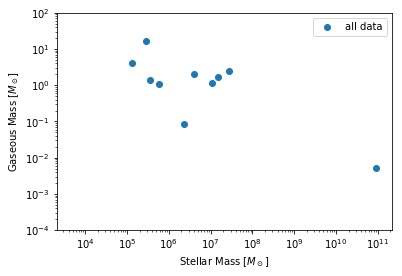

In [27]:
data = []
with open(sim4 + prop+'.data', 'rb') as f:
    while True:
        try:
            data.append(pickle.load(f))
        except EOFError:
            break
        
    data = pd.DataFrame(data)


### edit the code below to plot what you want

plt.figure()
plt.loglog()
plt.ylim(1e-4, 1e2)
# notice how you can retrieve the things we stored using the data array with data['key']
plt.scatter(data['mstar'],data['HIGF'],label='all data') 
# notice also that you can filter the stored arrays based on the values of other stored arrays
# using data['key'][True/False statement]
#plt.scatter(data['mstar'][data['haloid']>=100], data['mgas'][data['haloid']>=100],label='haloid > 100')
plt.legend()
plt.xlabel('Stellar Mass [$M_\odot$]')
plt.ylabel('Gaseous Mass [$M_\odot$]')
plt.show()

In [28]:
print(data['HIGF'])

0     0.0051529498930892315
1        1.6513174962607187
2         2.471294167294117
3        1.1794809477233457
4         2.054735840892067
5        1.0987871445993505
6       0.08600937882103071
7                       0.0
8                       0.0
9                       0.0
10       1.3695957650105643
11                      0.0
12        4.115172100292927
13                      0.0
14                      0.0
15                      0.0
16                      0.0
17                      0.0
18       16.244744444013936
19                      0.0
20                      0.0
21                      0.0
22                      0.0
Name: HIGF, dtype: object


In [32]:
fquenches = len(data['HIGF'][data['HIGF']<0.2])/len(data['HIGF'])

In [33]:
fquenches

0.6521739130434783